In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [2]:
# Leer archivo CSV
df_csv = pd.read_csv('Set_datos_T1_completo.csv')
df_csv

,formacion_academica,estrato_socioeconomico,sexo,edad,desempeno_neurocognitivo,duracion_sueno,consumo_cafe,fc_antes,fc_despues,fr_antes,fr_despues,pas_antes,pad_antes,pas_despues,pad_despues
0,2.5,1.2,Mujer,36,2.8,1,2,87.483571,79.684860,14.649643,14.557451,109.429593,78.925925,104.495644,75.160523
1,4.5,3.0,Mujer,28,2.1,4,3,84.308678,77.459411,15.710963,14.571348,111.845346,66.111595,107.852646,62.038182
2,3.9,3.1,Mujer,54,2.8,4,2,88.238443,83.119182,14.415160,12.828766,110.289699,78.573728,105.634449,75.075038
3,3.1,3.0,Hombre,42,4.0,4,4,92.615149,88.909023,15.384077,11.496389,112.260021,73.831380,105.830557,72.773877
4,4.2,3.0,Hombre,29,3.6,2,4,83.829233,77.432786,12.212771,9.656218,113.929248,78.537289,106.373535,75.692711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.0,4.2,Hombre,59,3.0,4,4,83.594499,76.454198,16.154961,14.126503,113.510666,86.049278,108.307406,81.748176
996,2.4,1.5,Hombre,21,1.6,3,2,93.988433,89.041475,16.515505,16.593317,118.845158,76.634973,111.510723,75.633318
997,4.4,5.0,Hombre,23,4.0,3,4,88.204214,84.967964,13.516479,11.836777,112.363055,70.824377,104.186160,68.529694
998,3.8,3.5,Mujer,32,1.8,4,1,82.144105,77.470239,16.668353,13.024975,114.974467,83.264565,111.344441,79.768800


## **<span style="color:#1a73e8;">PRUEBAS DE UNA SOLA MUESTRA</span>**


Variable: fc_antes  (n = 1000)

--- Prueba de normalidad (Shapiro-Wilk) ---
H0: Los datos provienen de una distribución normal.
H1: Los datos NO provienen de una distribución normal.
Estadístico W=0.9986, p=0.6266
Resultado: No se rechaza H0 → los datos pueden considerarse normales.


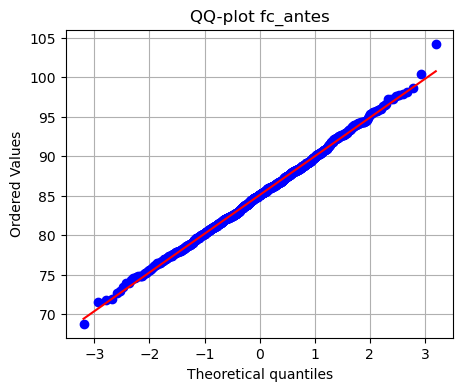

In [3]:
col = "fc_antes"   # columna para prueba de una muestra
mu_0 = 80           # media poblacional hipotética

# ----------------------------
# PRUEBA DE NORMALIDAD
# ----------------------------
x = df_csv[col].dropna().astype(float)
n = len(x)
print(f"\nVariable: {col}  (n = {n})")

# Hipótesis de normalidad
print("\n--- Prueba de normalidad (Shapiro-Wilk) ---")
print("H0: Los datos provienen de una distribución normal.")
print("H1: Los datos NO provienen de una distribución normal.")

sh_stat, sh_p = stats.shapiro(x)
print(f"Estadístico W={sh_stat:.4f}, p={sh_p:.4f}")
if sh_p > 0.05:
    print("Resultado: No se rechaza H0 → los datos pueden considerarse normales.")
else:
    print("Resultado: Se rechaza H0 → los datos NO siguen una distribución normal.")

# QQ-plot para ver gráficamente la normalidad
plt.figure(figsize=(5,4))
stats.probplot(x, dist="norm", plot=plt)
plt.title(f"QQ-plot {col}")
plt.grid(True)
plt.show()


In [4]:
# ----------------------------
# PRUEBA T DE UNA MUESTRA
# ----------------------------
print("\n--- Prueba t de una muestra ---")
print(f"H0: μ = {mu_0} (la media muestral no difiere de la media poblacional)")
print(f"H1: μ ≠ {mu_0} (la media muestral difiere significativamente de la media poblacional)")

mean_x = x.mean()
s = x.std(ddof=1)

# Forma manual
t_stat_manual = (mean_x - mu_0) / (s / np.sqrt(n))
p_manual = 2 * (1 - stats.t.cdf(abs(t_stat_manual), df=n-1))
print(f"\n[Manual] t={t_stat_manual:.3f}, p={p_manual:.4f}, media={mean_x:.2f}, s={s:.2f}")

# Con scipy
t_stat_scipy, p_scipy = stats.ttest_1samp(x, popmean=mu_0, nan_policy='omit')
print(f"[SciPy]  t={t_stat_scipy:.3f}, p={p_scipy:.4f}")

if p_scipy < 0.05:
    print("Resultado: Se rechaza H0 → la media difiere significativamente de μ₀.")
else:
    print("Resultado: No se rechaza H0 → la media no difiere de μ₀.")



--- Prueba t de una muestra ---
H0: μ = 80 (la media muestral no difiere de la media poblacional)
H1: μ ≠ 80 (la media muestral difiere significativamente de la media poblacional)

[Manual] t=32.918, p=0.0000, media=85.10, s=4.90
[SciPy]  t=32.918, p=0.0000
Resultado: Se rechaza H0 → la media difiere significativamente de μ₀.


In [6]:
# ----------------------------
# ALTERNATIVA NO PARAMÉTRICA (Wilcoxon)
# ----------------------------
if sh_p <= 0.05 and n < 30:
    print("\n--- Prueba Wilcoxon (no paramétrica, una muestra) ---")
    print(f"H0: mediana = {mu_0}")
    print(f"H1: mediana ≠ {mu_0}")
    stat_w, p_w = stats.wilcoxon(x - mu_0)
    print(f"Wilcoxon: stat={stat_w:.3f}, p={p_w:.4f}")
    if p_w < 0.05:
        print("Resultado: Se rechaza H0 → la mediana difiere significativamente de μ₀.")
    else:
        print("Resultado: No se rechaza H0 → la mediana no difiere de μ₀.")
else:
    print("\nNo se realizó Wilcoxon (normalidad o n grande).")


No se realizó Wilcoxon (normalidad o n grande).


## **<span style="color:#1a73e8;">PRUEBAS DE DOS GRUPOS</span>**

### **<span style="color:#1a73e8;">PRUEBA T PAREADA</span>**

In [7]:
# ----------------------------
# PRUEBA T PAREADA (antes vs después)
# ----------------------------
col1 = "fc_antes"
col2 = "fc_despues"

pairs = pd.concat([df_csv[col1], df_csv[col2]], axis=1).dropna()
x1 = pairs[col1].astype(float)
x2 = pairs[col2].astype(float)
diff = x2 - x1
n_pairs = len(diff)

print(f"\n--- Prueba t pareada: {col1} vs {col2} ---")
print(f"H0: μ_dif = 0 (no hay cambio entre antes y después)")
print(f"H1: μ_dif ≠ 0 (sí hay cambio entre antes y después)")

# Normalidad de las diferencias
sh_d_stat, sh_d_p = stats.shapiro(diff)
print(f"\nNormalidad de las diferencias: W={sh_d_stat:.4f}, p={sh_d_p:.4f}")

# t pareada
t_pareada_stat, p_pareada = stats.ttest_rel(x2, x1, nan_policy='omit')
print(f"t pareada (scipy): t={t_pareada_stat:.3f}, p={p_pareada:.4f}")

if p_pareada < 0.05:
    print("Resultado: Se rechaza H0 → hay diferencia significativa entre antes y después.")
else:
    print("Resultado: No se rechaza H0 → no hay cambio significativo.")

# Wilcoxon pareado si no hay normalidad
if sh_d_p <= 0.05 and n_pairs < 30:
    print("\n--- Prueba Wilcoxon pareada ---")
    print("H0: mediana de las diferencias = 0")
    print("H1: mediana de las diferencias ≠ 0")
    stat_w_p, p_w_p = stats.wilcoxon(x2 - x1)
    print(f"Wilcoxon pareado: stat={stat_w_p:.3f}, p={p_w_p:.4f}")
    if p_w_p < 0.05:
        print("Resultado: Se rechaza H0 → hay cambio significativo en la mediana.")
    else:
        print("Resultado: No se rechaza H0 → no hay cambio significativo.")
else:
    print("\nNo se realizó Wilcoxon pareado (diferencias normales o n grande).")


--- Prueba t pareada: fc_antes vs fc_despues ---
H0: μ_dif = 0 (no hay cambio entre antes y después)
H1: μ_dif ≠ 0 (sí hay cambio entre antes y después)

Normalidad de las diferencias: W=0.9988, p=0.7309
t pareada (scipy): t=-81.504, p=0.0000
Resultado: Se rechaza H0 → hay diferencia significativa entre antes y después.

No se realizó Wilcoxon pareado (diferencias normales o n grande).


### **<span style="color:#1a73e8;">PRUEBA T - GRUPOS INDEPENDIENTES</span>**

In [8]:
def boxplot_by_group(df, quantitative_col, categorical_col):
    """
    Crea un boxplot por grupo usando Plotly.

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame que contiene las variables.
    quantitative_col : str
        Nombre de la columna cuantitativa (numérica).
    categorical_col : str
        Nombre de la columna cualitativa (categórica).
    title : str
        Título del gráfico.

    Retorna:
    --------
    fig : plotly.graph_objects.Figure
        Objeto figura interactiva.
    """
    fig = px.box(
        df,
        x=categorical_col,
        y=quantitative_col,
        color=categorical_col,
        title='Boxplot por grupo',
        points="outliers",  # muestra los puntos outliers
        template="plotly_white"
    )

    fig.update_layout(
        xaxis_title=categorical_col,
        yaxis_title=quantitative_col,
        font=dict(size=14),
        title_font_size=16
    )

    fig.show()

In [9]:
boxplot_by_group(df_csv, 'pad_antes', 'sexo')

In [10]:
# 1. Agrupar por sexo
grupo_m = df_csv[df_csv['sexo'] == 'Mujer']['pad_antes'].dropna()
grupo_h = df_csv[df_csv['sexo'] == 'Hombre']['pad_antes'].dropna()

# 4. Normalidad por grupo: Shapiro-Wilk
shapiro_m = stats.shapiro(grupo_m)
shapiro_f = stats.shapiro(grupo_h)

# 2. Pruebas de normalidad
# Shapiro-Wilk
shapiro_m = stats.shapiro(grupo_m)
shapiro_h = stats.shapiro(grupo_h)

print("\n--- Prueba de Normalidad: Shapiro-Wilk ---")
print(f"Mujeres: estadístico={shapiro_m.statistic:.4f}, p-valor={shapiro_m.pvalue:.4f}")
if shapiro_m.pvalue > 0.05:
    print("→ No se rechaza la hipótesis nula: los datos de mujeres tienen distribución normal.")
else:
    print("→ Se rechaza la hipótesis nula: los datos de mujeres NO tienen distribución normal.")

print(f"Hombres: estadístico={shapiro_h.statistic:.4f}, p-valor={shapiro_h.pvalue:.4f}")
if shapiro_h.pvalue > 0.05:
    print("→ No se rechaza la hipótesis nula: los datos de hombres tienen distribución normal.")
else:
    print("→ Se rechaza la hipótesis nula: los datos de hombres NO tienen distribución normal.")

# Kolmogorov-Smirnov (contra distribución normal teórica)
ks_m = stats.kstest(grupo_m, 'norm', args=(grupo_m.mean(), grupo_m.std()))
ks_h = stats.kstest(grupo_h, 'norm', args=(grupo_h.mean(), grupo_h.std()))

print("\n--- Prueba de Normalidad: Kolmogorov-Smirnov ---")
print(f"Mujeres: estadístico={ks_m.statistic:.4f}, p-valor={ks_m.pvalue:.4f}")
if ks_m.pvalue > 0.05:
    print("→ No se rechaza la hipótesis nula: los datos de mujeres se ajustan a una distribución normal.")
else:
    print("→ Se rechaza la hipótesis nula: los datos de mujeres NO se ajustan a una distribución normal.")

print(f"Hombres: estadístico={ks_h.statistic:.4f}, p-valor={ks_h.pvalue:.4f}")
if ks_h.pvalue > 0.05:
    print("→ No se rechaza la hipótesis nula: los datos de hombres se ajustan a una distribución normal.")
else:
    print("→ Se rechaza la hipótesis nula: los datos de hombres NO se ajustan a una distribución normal.")

# 3. Homogeneidad de varianzas: prueba de Levene
levene_test = stats.levene(grupo_m, grupo_h)
print("\n--- Prueba de Homogeneidad de Varianzas: Levene ---")
print(f"Estadístico={levene_test.statistic:.4f}, p-valor={levene_test.pvalue:.4f}")
if levene_test.pvalue > 0.05:
    print("→ No se rechaza la hipótesis nula: las varianzas son iguales (homocedasticidad).")
else:
    print("→ Se rechaza la hipótesis nula: las varianzas son diferentes (heterocedasticidad).")

# 4. T-test para muestras independientes
ttest = stats.ttest_ind(grupo_m, grupo_h)

print("\n--- Prueba T para muestras independientes ---")
print(f"Estadístico t={ttest.statistic:.4f}, p-valor={ttest.pvalue:.4f}")
if ttest.pvalue < 0.05:
    print("→ Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("→ No se rechaza la hipótesis nula: NO hay diferencia significativa entre los grupos.")


--- Prueba de Normalidad: Shapiro-Wilk ---
Mujeres: estadístico=0.9942, p-valor=0.0488
→ Se rechaza la hipótesis nula: los datos de mujeres NO tienen distribución normal.
Hombres: estadístico=0.9960, p-valor=0.2685
→ No se rechaza la hipótesis nula: los datos de hombres tienen distribución normal.

--- Prueba de Normalidad: Kolmogorov-Smirnov ---
Mujeres: estadístico=0.0351, p-valor=0.5369
→ No se rechaza la hipótesis nula: los datos de mujeres se ajustan a una distribución normal.
Hombres: estadístico=0.0278, p-valor=0.8358
→ No se rechaza la hipótesis nula: los datos de hombres se ajustan a una distribución normal.

--- Prueba de Homogeneidad de Varianzas: Levene ---
Estadístico=0.2851, p-valor=0.5935
→ No se rechaza la hipótesis nula: las varianzas son iguales (homocedasticidad).

--- Prueba T para muestras independientes ---
Estadístico t=3.4645, p-valor=0.0006
→ Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos.


## **<span style="color:#1a73e8;">PRUEBAS DE TRES O MÁS GRUPOS</span>**

### **<span style="color:#1a73e8;">DATOS INDEPENDIENTES - ANOVA</span>**

In [11]:
boxplot_by_group(df_csv, 'fc_antes', 'consumo_cafe')

In [12]:
# 1. Agrupar por consumo_cafe
grupo_1 = df_csv[df_csv['consumo_cafe'] == 1]['fc_antes'].dropna()
grupo_2 = df_csv[df_csv['consumo_cafe'] == 2]['fc_antes'].dropna()
grupo_3 = df_csv[df_csv['consumo_cafe'] == 3]['fc_antes'].dropna()
grupo_4 = df_csv[df_csv['consumo_cafe'] == 4]['fc_antes'].dropna()


# 3. Crear modelo ANOVA (One-way)
modelo = ols('fc_antes ~ C(consumo_cafe)', data=df_csv).fit()
anova = sm.stats.anova_lm(modelo, typ=2)

print("\n--- Resultado del ANOVA de una vía ---")
print(anova)

# 4. Supuesto de normalidad de los residuos
residuos = modelo.resid
shapiro_test = stats.shapiro(residuos)
print("\n--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---")
print(f"Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("→ Los residuos siguen una distribución normal (no se rechaza H₀).")
else:
    print("→ Los residuos no siguen una distribución normal (se rechaza H₀).")

# 5. Supuesto de homogeneidad de varianzas (Levene)
levene = stats.levene(grupo_1, grupo_2, grupo_3, grupo_4)
print("\n--- Prueba de homogeneidad de varianzas (Levene) ---")
print(f"Estadístico={levene.statistic:.4f}, p-valor={levene.pvalue:.4f}")
if levene.pvalue > 0.05:
    print("→ Se asume homogeneidad de varianzas (no se rechaza H₀).")
else:
    print("→ No hay homogeneidad de varianzas (se rechaza H₀).")

# 6. Interpretación del ANOVA
p_anova = anova["PR(>F)"].iloc[0]
print("\n--- Conclusión ---")
if p_anova < 0.05:
    print(f"p-valor={p_anova:.4f} → Se rechaza la hipótesis nula.")
    print("→ Existen diferencias significativas en la frecuencia cardíaca entre los niveles de consumo de café.")
else:
    print(f"p-valor={p_anova:.4f} → No se rechaza la hipótesis nula.")
    print("→ No se encontraron diferencias significativas entre los grupos de consumo de café.")



--- Resultado del ANOVA de una vía ---
                       sum_sq     df         F    PR(>F)
C(consumo_cafe)      9.340698    3.0  0.129546  0.942555
Residual         23938.284045  996.0       NaN       NaN

--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---
Estadístico=0.9986, p-valor=0.6292
→ Los residuos siguen una distribución normal (no se rechaza H₀).

--- Prueba de homogeneidad de varianzas (Levene) ---
Estadístico=1.3837, p-valor=0.2463
→ Se asume homogeneidad de varianzas (no se rechaza H₀).

--- Conclusión ---
p-valor=0.9426 → No se rechaza la hipótesis nula.
→ No se encontraron diferencias significativas entre los grupos de consumo de café.


Valores únicos en 'genero': ['Mujer' 'Hombre']
Valores únicos en 'consumo_cafe': [2 3 4 1]

--- Resultado del ANOVA de dos vías ---
                               sum_sq     df         F    PR(>F)
C(sexo)                      1.071463    1.0  0.044405  0.833146
C(consumo_cafe)              9.222374    3.0  0.127401  0.943870
C(sexo):C(consumo_cafe)      0.782849    3.0  0.010815  0.998460
Residual                 23936.429733  992.0       NaN       NaN

--- Hipótesis ---
H0₁: No hay efecto del género sobre la frecuencia cardíaca.
H0₂: No hay efecto del consumo de café sobre la frecuencia cardíaca.
H0₃: No existe interacción entre género y consumo de café.
H1: Al menos uno de los factores o su interacción influye significativamente en la frecuencia cardíaca.


--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---
Estadístico=0.9986, p-valor=0.6365
→ No se rechaza H₀: los residuos siguen una distribución normal.

--- Prueba de homogeneidad de varianzas (Levene) ---
Estadístico=1.14

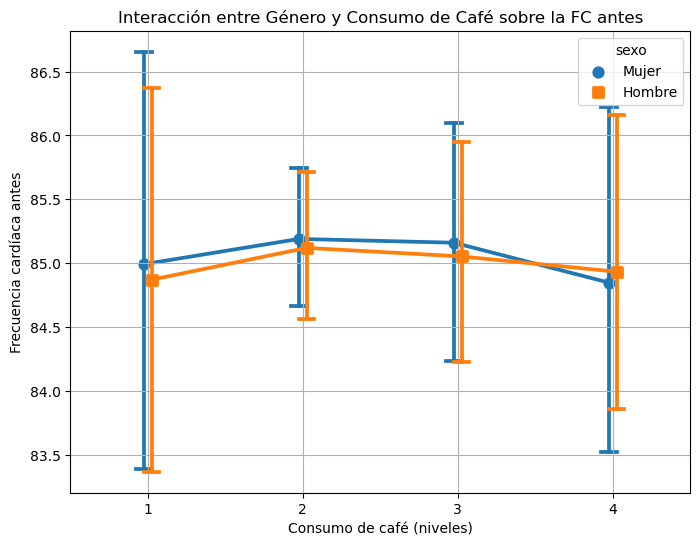

In [13]:
# ---------------------------------------------------
# ANOVA DE DOS VÍAS: efecto de genero y consumo de café sobre fc_antes
# ---------------------------------------------------


# Verificar valores únicos
print("Valores únicos en 'genero':", df_csv['sexo'].unique())
print("Valores únicos en 'consumo_cafe':", df_csv['consumo_cafe'].unique())

# ---------------------------------------------------
# 1. Definir modelo ANOVA de dos vías con interacción
# ---------------------------------------------------
# Efectos principales + interacción
modelo_2way = ols('fc_antes ~ C(sexo) * C(consumo_cafe)', data=df_csv).fit()
anova_2way = sm.stats.anova_lm(modelo_2way, typ=2)

print("\n--- Resultado del ANOVA de dos vías ---")
print(anova_2way)

# ---------------------------------------------------
# 2. Hipótesis planteadas
# ---------------------------------------------------
print("""
--- Hipótesis ---
H0₁: No hay efecto del género sobre la frecuencia cardíaca.
H0₂: No hay efecto del consumo de café sobre la frecuencia cardíaca.
H0₃: No existe interacción entre género y consumo de café.
H1: Al menos uno de los factores o su interacción influye significativamente en la frecuencia cardíaca.
""")


# ---------------------------------------------------
# 3. Supuestos del ANOVA
# ---------------------------------------------------

# a) Normalidad de los residuos
residuos = modelo_2way.resid
shapiro_test = stats.shapiro(residuos)
print("\n--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---")
print(f"Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("→ No se rechaza H₀: los residuos siguen una distribución normal.")
else:
    print("→ Se rechaza H₀: los residuos no son normales.")

# b) Homogeneidad de varianzas (Levene)
grupos = [g["fc_antes"].dropna() for _, g in df_csv.groupby(["sexo", "consumo_cafe"])]
levene = stats.levene(*grupos)
print("\n--- Prueba de homogeneidad de varianzas (Levene) ---")
print(f"Estadístico={levene.statistic:.4f}, p-valor={levene.pvalue:.4f}")
if levene.pvalue > 0.05:
    print("→ No se rechaza H₀: se asume homogeneidad de varianzas.")
else:
    print("→ Se rechaza H₀: no hay homogeneidad de varianzas (cuidado con el supuesto).")


# ---------------------------------------------------
# 4. Interpretación de los resultados del ANOVA
# ---------------------------------------------------
print("\n--- Interpretación del ANOVA de dos vías ---")

for factor in anova_2way.index[:-1]:  # excluimos 'Residual'
    p_valor = anova_2way.loc[factor, "PR(>F)"]
    if p_valor < 0.05:
        print(f"Factor '{factor}': p={p_valor:.4f} → Se rechaza H₀ → efecto significativo.")
    else:
        print(f"Factor '{factor}': p={p_valor:.4f} → No se rechaza H₀ → sin efecto significativo.")


# ---------------------------------------------------
# 5. Visualización 
# ---------------------------------------------------
import seaborn as sns

plt.figure(figsize=(8,6))
sns.pointplot(
    data=df_csv,
    x="consumo_cafe",
    y="fc_antes",
    hue="sexo",
    dodge=True,
    markers=["o", "s"],
    capsize=.1
)
plt.title("Interacción entre Género y Consumo de Café sobre la FC antes")
plt.xlabel("Consumo de café (niveles)")
plt.ylabel("Frecuencia cardíaca antes")
plt.grid(True)
plt.show()

### ***Conceptos***

### 🧩 Intervalo de Confianza

El **intervalo de confianza (IC)** es un rango de valores que se calcula a partir de los datos de una muestra y que **estima con cierto nivel de confianza** (por ejemplo, 95%) el valor real del parámetro en la población.

En otras palabras, el IC nos indica **qué tan seguros estamos** de que la media o el parámetro verdadero se encuentre dentro de ese rango.

- Un **IC estrecho** significa que la estimación es **precisa** (los datos son consistentes o el tamaño de muestra es grande).  
- Un **IC amplio** indica **mayor incertidumbre** (mucha variabilidad o pocos datos).

En las gráficas, los intervalos de confianza suelen representarse con **barras verticales** que se extienden hacia arriba y hacia abajo desde el promedio.  
Estas barras muestran el margen de error alrededor de la media estimada.

> 📊 Ejemplo: Si el promedio de frecuencia cardíaca antes de consumir café es 80 bpm con un IC 95% [78 – 82], podemos decir que **tenemos un 95% de confianza de que la media real** en la población está entre **78 y 82 bpm**.


### **<span style="color:#1a73e8;">DATOS PAREADOS</span>**

In [ ]:
# ============================
# 1️⃣ Datos simulados
# ============================
# sujetos medidos en tres condiciones: antes, durante, después
df = pd.DataFrame({
    'sujeto': [1, 2, 3, 4, 5, 6],
    'antes': [80, 85, 90, 88, 92, 95],
    'durante': [78, 83, 87, 85, 89, 93],
    'despues': [75, 80, 85, 82, 87, 90]
})

# ============================
# 2️⃣ Evaluar normalidad de las diferencias pareadas
# ============================
diff1 = df['durante'] - df['antes']
diff2 = df['despues'] - df['durante']
diff3 = df['despues'] - df['antes']

print("\n--- Evaluación de normalidad (Shapiro-Wilk) ---")
normal = True  # bandera para decidir qué prueba usar

for name, diff in {'durante-antes': diff1, 'despues-durante': diff2, 'despues-antes': diff3}.items():
    stat, p = stats.shapiro(diff)
    print(f"{name}: W={stat:.4f}, p={p:.4f}")
    if p <= 0.05:
        normal = False  # alguna diferencia no es normal

# ============================
# 3️⃣ Selección de la prueba según normalidad
# ============================
if normal:
    print("\n✅ Todas las diferencias son normales → usar ANOVA de medidas repetidas.")

    # Reestructurar al formato largo para ANOVA
    df_long = pd.melt(df, id_vars=['sujeto'], value_vars=['antes', 'durante', 'despues'],
                      var_name='condicion', value_name='valor')
    
    print(df_long)

    # ANOVA de medidas repetidas (paramétrica)
    anova = AnovaRM(df_long, depvar='valor', subject='sujeto', within=['condicion']).fit()
    print("\n--- ANOVA de medidas repetidas ---")
    print(anova)
    
    print("\nHipótesis:")
    print("H0: las medias son iguales entre las tres condiciones.")
    print("H1: al menos una media difiere.")
else:
    print("\n⚠️ Alguna diferencia no es normal → usar prueba de Friedman (no paramétrica).")

    friedman_stat, friedman_p = stats.friedmanchisquare(df['antes'], df['durante'], df['despues'])
    print("\n--- Prueba de Friedman ---")
    print(f"Estadístico = {friedman_stat:.4f}, p = {friedman_p:.4f}")
    
    print("\nHipótesis:")
    print("H0: las medianas son iguales entre las tres condiciones.")
    print("H1: al menos una mediana difiere.")
    
    if friedman_p < 0.05:
        print("Resultado: Se rechaza H0 → hay diferencia significativa entre condiciones.")
    else:
        print("Resultado: No se rechaza H0 → no hay diferencia significativa.")


--- Evaluación de normalidad (Shapiro-Wilk) ---
durante-antes: W=0.6827, p=0.0040
despues-durante: W=0.6399, p=0.0014
despues-antes: W=0.4961, p=0.0000

⚠️ Alguna diferencia no es normal → usar prueba de Friedman (no paramétrica).

--- Prueba de Friedman ---
Estadístico = 12.0000, p = 0.0025

Hipótesis:
H0: las medianas son iguales entre las tres condiciones.
H1: al menos una mediana difiere.
Resultado: Se rechaza H0 → hay diferencia significativa entre condiciones.
